In [1]:
# importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("household_energy.csv", parse_dates=['timestamp'])
df

,timestamp,temperature,outside_temperature,device_usage,energy_consumption
0,2025-07-01 00:00:00,23.75,39.26,0,2.95
1,2025-07-01 01:00:00,25.97,31.69,0,1.15
2,2025-07-01 02:00:00,28.66,34.02,1,3.21
3,2025-07-01 03:00:00,27.22,39.08,1,2.23
4,2025-07-01 04:00:00,23.04,32.87,1,2.34
5,2025-07-01 05:00:00,24.00,25.70,1,3.10
6,2025-07-01 06:00:00,27.85,28.00,0,3.46
7,2025-07-01 07:00:00,24.67,37.90,0,1.43
8,2025-07-01 08:00:00,20.65,39.23,1,3.49
9,2025-07-01 09:00:00,20.16,28.46,1,2.78


In [3]:
#Extract time features
df['hour']=df['timestamp'].dt.hour
df['day']=df['timestamp'].dt.day
df['weekday']=df['timestamp'].dt.dayofweek
df['date']=df['timestamp'].dt.date
df

,timestamp,temperature,outside_temperature,device_usage,energy_consumption,hour,day,weekday,date
0,2025-07-01 00:00:00,23.75,39.26,0,2.95,0,1,1,2025-07-01
1,2025-07-01 01:00:00,25.97,31.69,0,1.15,1,1,1,2025-07-01
2,2025-07-01 02:00:00,28.66,34.02,1,3.21,2,1,1,2025-07-01
3,2025-07-01 03:00:00,27.22,39.08,1,2.23,3,1,1,2025-07-01
4,2025-07-01 04:00:00,23.04,32.87,1,2.34,4,1,1,2025-07-01
5,2025-07-01 05:00:00,24.00,25.70,1,3.10,5,1,1,2025-07-01
6,2025-07-01 06:00:00,27.85,28.00,0,3.46,6,1,1,2025-07-01
7,2025-07-01 07:00:00,24.67,37.90,0,1.43,7,1,1,2025-07-01
8,2025-07-01 08:00:00,20.65,39.23,1,3.49,8,1,1,2025-07-01
9,2025-07-01 09:00:00,20.16,28.46,1,2.78,9,1,1,2025-07-01


In [4]:
#basic summary
print("=== Basic Info ===")
print(df.info())

=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            50 non-null     datetime64[ns]
 1   temperature          50 non-null     float64       
 2   outside_temperature  50 non-null     float64       
 3   device_usage         50 non-null     int64         
 4   energy_consumption   50 non-null     float64       
 5   hour                 50 non-null     int32         
 6   day                  50 non-null     int32         
 7   weekday              50 non-null     int32         
 8   date                 50 non-null     object        
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(1)
memory usage: 3.1+ KB
None


In [5]:
print("\n=== Summary ===")
print(df.describe())


=== Summary ===
                           timestamp  temperature  outside_temperature  \
count                             50    50.000000             50.00000   
mean   2025-07-02 00:29:59.999999744    25.310800             32.44260   
min              2025-07-01 00:00:00    20.160000             25.10000   
25%              2025-07-01 12:15:00    22.792500             28.76500   
50%              2025-07-02 00:30:00    25.290000             31.99000   
75%              2025-07-02 12:45:00    27.500000             35.93500   
max              2025-07-03 01:00:00    29.770000             39.94000   
std                              NaN     2.809494              4.47634   

       device_usage  energy_consumption      hour        day    weekday  
count     50.000000           50.000000  50.00000  50.000000  50.000000  
mean       0.520000            2.944800  11.06000   1.560000   1.560000  
min        0.000000            1.150000   0.00000   1.000000   1.000000  
25%        0.000000 

In [10]:
# Daily and weekly consumption analysis
daily_consumption = df.groupby('date')['energy_consumption'].sum()
weekly_consumption = df.groupby(df['timestamp'].dt.isocalendar().week)['energy_consumption'].sum()

In [11]:
print("\n=== Daily Consumption (First 5 Days) ===")
print(daily_consumption.head())


=== Daily Consumption (First 5 Days) ===
date
2025-07-01    67.46
2025-07-02    72.62
2025-07-03     7.16
Name: energy_consumption, dtype: float64


In [12]:
print("\n=== Weekly Consumption (First 7 Days) ===")
print(weekly_consumption.head())


=== Weekly Consumption (First 7 Days) ===
week
27    147.24
Name: energy_consumption, dtype: float64


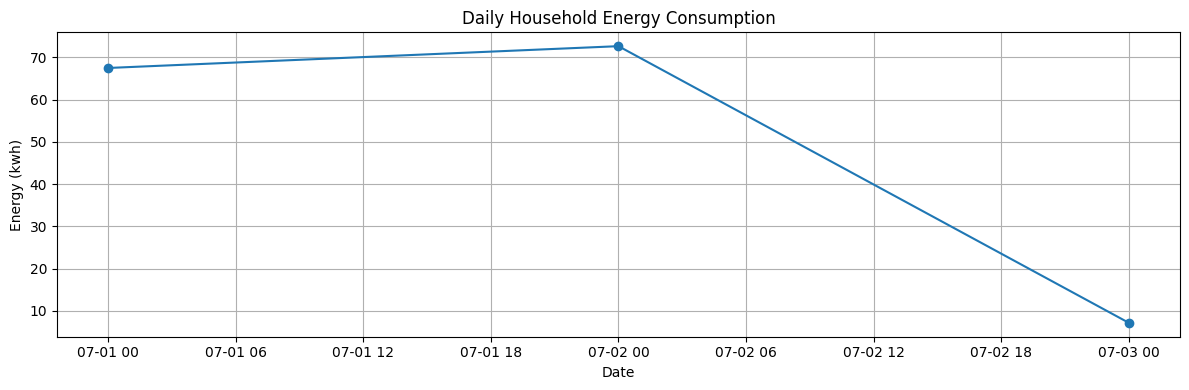

In [14]:
# Visualize Daily Usage
plt.figure(figsize=(12, 4))
plt.plot(daily_consumption.index, daily_consumption.values, marker='o')
plt.title("Daily Household Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy (kwh)")
plt.grid(True)
plt.tight_layout()
plt.savefig("daily_energy_plot.png")
plt.show()